Video game sales analysis is a popular problem statement on Kaggle. You can work on this problem to analyze the sales of more than 16,500 games or you can also train a machine learning model for forecasting video game sales.

The dataset I’m using for this task contains a list of video games and their sales. Let’s start this task by importing the necessary Python libraries and the dataset:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv(r"C:\Users\SHREE\Downloads\Python CODES\Video Game Sales Prediction Model with Python\vgsales.csv")
print(data.head())

   Rank                      Name Platform    Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37  


Now let’s see if this dataset contains null values:

In [2]:
print(data.isnull().sum())

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64


Now I’m going to create a new dataset removing the null values:

In [3]:
data = data.dropna()

Before we train the model, let’s take a look at the top 10 best-selling game categories:

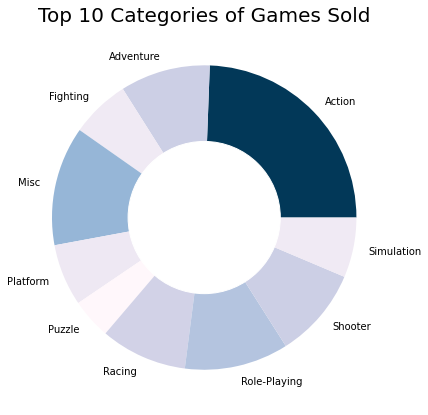

In [4]:
import matplotlib as mpl
game = data.groupby("Genre")["Global_Sales"].count().head(10)
custom_colors = mpl.colors.Normalize(vmin=min(game), vmax=max(game))
colours = [mpl.cm.PuBu(custom_colors(i)) for i in game]
plt.figure(figsize=(7,7))
plt.pie(game, labels=game.index, colors=colours)
central_circle = plt.Circle((0, 0), 0.5, color='white')
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc('font', size=12)
plt.title("Top 10 Categories of Games Sold", fontsize=20)
plt.show()

Now let’s have a look at the correlation between the features of this dataset:

                  Rank      Year  NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
Rank          1.000000  0.178027 -0.400315 -0.379137 -0.269323    -0.332735   
Year          0.178027  1.000000 -0.091285  0.006108 -0.169387     0.041128   
NA_Sales     -0.400315 -0.091285  1.000000  0.768923  0.451283     0.634518   
EU_Sales     -0.379137  0.006108  0.768923  1.000000  0.436379     0.726256   
JP_Sales     -0.269323 -0.169387  0.451283  0.436379  1.000000     0.290559   
Other_Sales  -0.332735  0.041128  0.634518  0.726256  0.290559     1.000000   
Global_Sales -0.426975 -0.074647  0.941269  0.903264  0.612774     0.747964   

              Global_Sales  
Rank             -0.426975  
Year             -0.074647  
NA_Sales          0.941269  
EU_Sales          0.903264  
JP_Sales          0.612774  
Other_Sales       0.747964  
Global_Sales      1.000000  


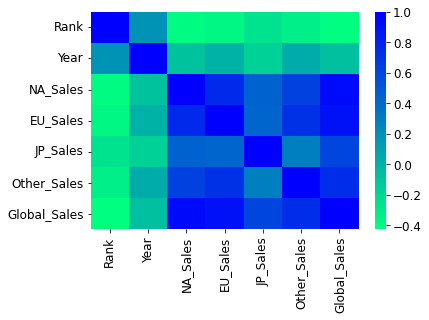

In [5]:
print(data.corr())
sns.heatmap(data.corr(), cmap="winter_r")
plt.show()

## Training Video Game Sales Prediction Model

Lets prepare the data by storing the features we need to train this model in the x variable and storing the target column in the y variable:

In [6]:
x = data[["Rank", "NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]]
y = data["Global_Sales"]

Now let’s split the data and use the linear regression algorithm to train this model:

In [7]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(xtrain, ytrain)
predictions = model.predict(xtest)

## Summary

This is how we can train a machine learning model to predict video game sales.